In [2]:
import pandas as pd
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1,2,2,3,3,4,5,6,7]})
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [10]:
E = [2,2,4,6,1,9,3,6,6]
df['E']= E
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,2
2,foo,one,large,2,4
3,foo,two,small,3,6
4,foo,two,small,3,1
5,bar,one,large,4,9
6,bar,one,small,5,3
7,bar,two,small,6,6
8,bar,two,large,7,6


# Pivot table

In [5]:
import numpy as np
table = pd.pivot_table(df,values='D',index=['A','B'],columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [6]:
table = pd.pivot_table(df,values='D',index=['A','B'],columns=['C'], aggfunc=np.average)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    2.0    1.0
    two    NaN    3.0

In [11]:
table = pd.pivot_table(df,values='D',index=['A','B'],columns=['C'], aggfunc=np.median)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    2.0    1.0
    two    NaN    3.0

# Bining

In [12]:
import seaborn as sns
sns.set_style('whitegrid')

In [14]:
raw_df = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/2018_Sales_Total_v2.xlsx?raw=true')
raw_df.head()


,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


In [16]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()
df.head()

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


## Bining Visualize

<AxesSubplot:ylabel='Frequency'>

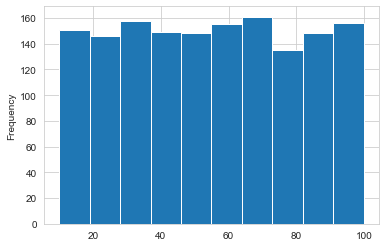

In [17]:
raw_df['unit price'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

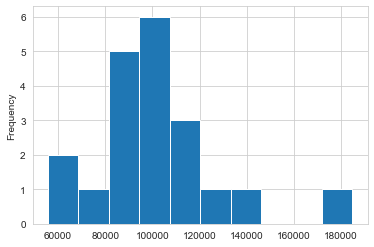

In [18]:
df['ext price'].plot(kind='hist')

## Bining quantitize in variable

In [19]:
pd.qcut(df['ext price'], q=4)

0     (55733.049000000006, 89137.708]
1             (89137.708, 100271.535]
2     (55733.049000000006, 89137.708]
3              (110132.552, 184793.7]
4             (89137.708, 100271.535]
5             (89137.708, 100271.535]
6     (55733.049000000006, 89137.708]
7            (100271.535, 110132.552]
8              (110132.552, 184793.7]
9              (110132.552, 184793.7]
10            (89137.708, 100271.535]
11    (55733.049000000006, 89137.708]
12    (55733.049000000006, 89137.708]
13            (89137.708, 100271.535]
14           (100271.535, 110132.552]
15             (110132.552, 184793.7]
16           (100271.535, 110132.552]
17             (110132.552, 184793.7]
18           (100271.535, 110132.552]
19           (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55733.049000000006, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 184793.7]]

In [20]:
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4)
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)

df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


In [21]:
df['quantile_ex_1'].value_counts()

(110132.552, 184793.7]             5
(100271.535, 110132.552]           5
(89137.708, 100271.535]            5
(55733.049000000006, 89137.708]    5
Name: quantile_ex_1, dtype: int64

In [22]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],q=[0, .2, .4, .6, .8, 1],labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


# Equally bining
allow easy identification of outlier

In [ ]:
# equal frequency
def equifreq(arr1, m):
    """method for making equally frequency bins

    Args:
        arr1 (list): integer list
        m (list): number of intervals 
    """
    a = len(arr1)
    n = int(a / m)
    for i in range(0, m):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr = arr + [arr1[j]]
        print(arr)

exaple_arr = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]
print("equal frequency binning")
equifreq(exaple_arr, 5)

equal frequency binning
[5, 10]
[11, 13]
[15, 35]
[50, 55]
[72, 92]


In [1]:
# equal width
def equiwidth(arr1, m):
	"""divide the bins by having equal width with a range of each bin are defined as [min + w],
	[min + 2w] …. [min + nw] where w = (max - min) / (no of bins).

	Args:
		arr1 (list[int]): data list of integers
		m (integer): number of bin interval
	"""
	a = len(arr1)
	w = int((max(arr1) - min(arr1)) / m)
	min1 = min(arr1)
	arr = []
	for i in range(0, m + 1):
		arr = arr + [min1 + w * i]
	arri=[]
	
	for i in range(0, m):
		temp = []
		for j in arr1:
			if j > arr[i] and j < arr[i+1]:
				temp += [j]
		arri += [temp]
	print(arri)

example_arr2 = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]
print("\n\nequal width binning")
equiwidth(example_arr2, 3)



equal width binning
[[10, 11, 13, 15, 35, 50, 55, 72], [92], [204]]
